# Project: Investigate a Dataset (tmdb-movies)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
>**This database was taken from database of movies called(TMDB)"a community built movie and tv database",each row is a record for a movie include a range of data about each film. Relevant data to be used to be used in the following analysis include the following variables:**

>-original_title

>-genres

>-release_year

>-release_date

>-budget

>-revenue



> **In this report, i will explore the following questions, Questions is:**: 

>1- What is the Highest Rating Movie?

>2- What is the Highest Revenue Movie?

>3- What is the Average Rating?

>4- What is the Average Revenue?

>5- Comparing Ratings, Revenues and Popularity, select some of the geners.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [27]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [28]:
df.shape

(10866, 21)

In [29]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Data Cleaning (Replace this with more specific notes!)

### Drop unused columns:

In [31]:
df.drop(['imdb_id','cast','homepage','tagline','overview','release_date'],axis=1,inplace=True)

In [32]:
df.head()

,id,popularity,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   director              10822 non-null  object 
 6   keywords              9373 non-null   object 
 7   runtime               10866 non-null  int64  
 8   genres                10843 non-null  object 
 9   production_companies  9836 non-null   object 
 10  vote_count            10866 non-null  int64  
 11  vote_average          10866 non-null  float64
 12  release_year          10866 non-null  int64  
 13  budget_adj            10866 non-null  float64
 14  revenue_adj           10866 non-null  float64
dtypes: float64(4), int6

### Count Duplicates:

In [34]:
sum(df.duplicated())

1

### Drop Duplicates:

In [35]:
df.drop_duplicates(inplace=True)

In [36]:
sum(df.duplicated())

0

### Filling the missing values:

In [37]:
df.fillna(df.mean(), inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   popularity            10865 non-null  float64
 2   budget                10865 non-null  int64  
 3   revenue               10865 non-null  int64  
 4   original_title        10865 non-null  object 
 5   director              10821 non-null  object 
 6   keywords              9372 non-null   object 
 7   runtime               10865 non-null  int64  
 8   genres                10842 non-null  object 
 9   production_companies  9835 non-null   object 
 10  vote_count            10865 non-null  int64  
 11  vote_average          10865 non-null  float64
 12  release_year          10865 non-null  int64  
 13  budget_adj            10865 non-null  float64
 14  revenue_adj           10865 non-null  float64
dtypes: float64(4), int6

### Drop rows with empty values:

In [39]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8691 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    8691 non-null   int64  
 1   popularity            8691 non-null   float64
 2   budget                8691 non-null   int64  
 3   revenue               8691 non-null   int64  
 4   original_title        8691 non-null   object 
 5   director              8691 non-null   object 
 6   keywords              8691 non-null   object 
 7   runtime               8691 non-null   int64  
 8   genres                8691 non-null   object 
 9   production_companies  8691 non-null   object 
 10  vote_count            8691 non-null   int64  
 11  vote_average          8691 non-null   float64
 12  release_year          8691 non-null   int64  
 13  budget_adj            8691 non-null   float64
 14  revenue_adj           8691 non-null   float64
dtypes: float64(4), int64

### Cleaning data summry:

>**First, i dropped five useless columns to my questions.Second,i have one duplicate and i drop it.After That, i filled the missing values. In the end,i dropped the records that have null values**

<a id='eda'></a>
## Exploratory Data Analysis


### What is the Highest  Rating Movie?

In [40]:
max_vote = df['vote_average'].idxmax()
Name = df.loc[max_vote, 'original_title']
Rate = max(df['vote_average'])
print("Highest Movie Rate:")
print("\tName: "+Name+"\n\tRate: "+str(Rate))

Highest Movie Rate:
	Name: Pink Floyd: Pulse
	Rate: 8.7


### What is the Highest Revenue Movie?

In [41]:
max_revenue = df['revenue'].idxmax()
Name = df.loc[max_revenue, 'original_title']
revenue = max(df['revenue'])
print("Highest Revenue:")
print("\tName: "+Name+"\n\tRevenue: "+str(revenue)+"$")

Highest Revenue:
	Name: Avatar
	Revenue: 2781505847$


### What is the Average rating?

Average Rate:6


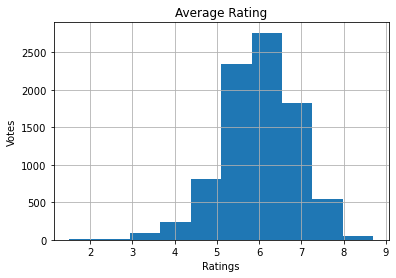

In [88]:
average_rate = round(df['vote_average'].mean())
print("Average Rate:"+str(average_rate))
df['vote_average'].hist();
plt.title('Average Rating');
plt.xlabel('Ratings');
plt.ylabel('Votes');

**I conclude from this chart that the average rating is 6/10**

### What is the Average Revenue by years?

Average Revenue:49106971$


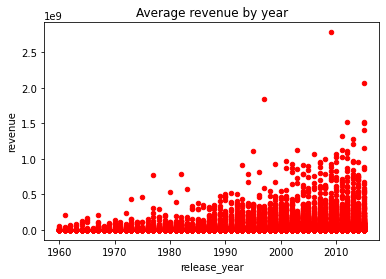

In [90]:
average_revenue = round(df['revenue'].mean())
print("Average Revenue:"+str(average_revenue)+"$")
df.plot(title = 'Average revenue by year', x ='release_year', y='revenue',kind='scatter',color = 'red');

**I conclude from this chart that the average revenue by year is 49106971 $**

### Comparing Ratings, Revenues and Popularity, select some of the genres.

**Functions**

In [73]:
#this function returns genre reveunue 
def genre_rev(genre):
    return df.query(' genres == "%s"' %genre).revenue.sum()
#this function returns genre average rate 
def avg_rate(genre):
    return round( df.query(' genres == "%s"' %genre).vote_average.mean(),2)
#this function returns genre popularity 
def pop(genre):
    return round( df.query(' genres ==  "%s"' %genre).popularity.mean(),3)

**Comedy genre**

In [74]:
ComedyRev = genre_rev("Comedy")
ComedyAvgRate = avg_rate("Comedy")
ComedyPop = pop("Comedy")
print("Genre: Comedy")
print("\tTotal Revenue: ("+str(ComedyRev)+")$ \n\tAverage Rate: ("+str(ComedyAvgRate)+"/10)")
print("\tpopularity: ("+str(ComedyPop)+")")

Genre: Comedy
	Total Revenue: (19779865016)$ 
	Average Rate: (5.84/10)
	popularity: (0.626)


**Action genre**

In [66]:
ActionRev = genre_rev("Action")
ActionAvgRate = avg_rate("Action")
ActionPop = pop("Action")
print("Genre: Action")
print("\tTotal Revenue: ("+str(ActionRev)+")$ \n\tAverage Rate: ("+str(ActionAvgRate)+"/10)")
print("\tpopularity: ("+str(ActionPop)+")")

Genre: Action
	Total Revenue: (2301467671)$ 
	Average Rate: (5.63/10)
	popularity: (0.744)


**Adventure genre**

In [76]:
AdventureRev = genre_rev("Adventure")
AdventureAvgRate = avg_rate("Adventure")
AdventurePop = pop("Adventure")
print("Genre: Adventure")
print("\tTotal Revenue: ("+str(AdventureRev)+")$ \n\tAverage Rate: ("+str(AdventureAvgRate)+"/10)")
print("\tpopularity: ("+str(AdventurePop)+")")

Genre: Adventure
	Total Revenue: (954585129)$ 
	Average Rate: (5.64/10)
	popularity: (0.712)


**Drama genre**

In [77]:
DramaRev = genre_rev("Drama")
DramaAvgRate = avg_rate("Drama")
DramaPop = pop("Drama")
print("Genre: Drama")
print("\tTotal Revenue: ("+str(DramaRev)+")$ \n\tAverage Rate: ("+str(DramaAvgRate)+"/10)")
print("\tpopularity: ("+str(DramaPop)+")")

Genre: Drama
	Total Revenue: (14914250081)$ 
	Average Rate: (6.39/10)
	popularity: (0.568)


**Horror genre**

In [79]:
HorrorRev = genre_rev("Horror")
HorrorAvgRate = genre_rev("Horror")
HorrorPop =  pop("Horror")
print("Genre: Horror")
print("\tTotal Revenue: ("+str(HorrorRev)+")$ \n\tAverage Rate: ("+str(HorrorAvgRate)+"/10)")
print("\tpopularity: ("+str(HorrorPop)+")")

Genre: Horror
	Total Revenue: (2767966390)$ 
	Average Rate: (2767966390/10)
	popularity: (0.425)


### Comparing genres by Ratings

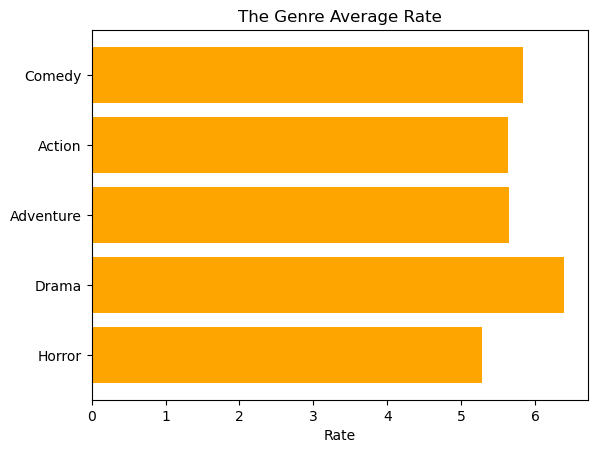

In [24]:
np.random.seed(19680801)
plt.rcdefaults()
fig, ax = plt.subplots()

genres_1 = ( 'Comedy', 'Action', 'Adventure', 'Drama', 'Horror')
y_pos = np.arange(len(genres_1))
Genre_Rate = ( ComedyAvgRate, ActionAvgRate, AdventureAvgRate, DramaAvgRate, HorrorAvgRate)
error = np.random.rand(len(genres_1))

ax.barh(y_pos, Genre_Rate, align='center', color='orange')
ax.set_yticks(y_pos)
ax.set_yticklabels(genres_1)
ax.invert_yaxis()
ax.set_xlabel('Rate')
ax.set_title('The Genre Average Rate')
plt.show()

**I conclude from this chart that drama's average rate take lead with 6.39/10 rate .Then, comedy came second with 5.84.etc.**

### Comparing genres by Revenue

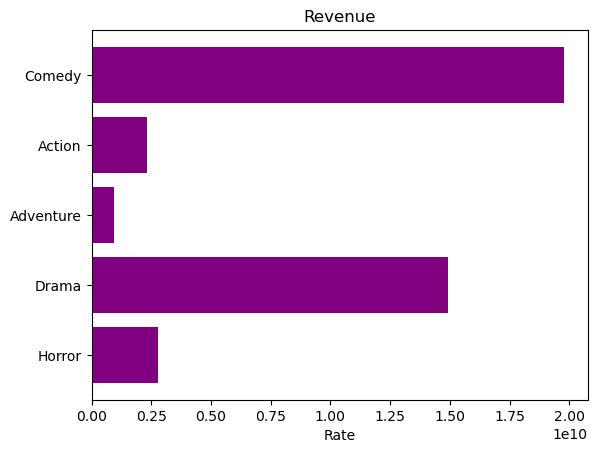

In [25]:
np.random.seed(19680801)
plt.rcdefaults()
fig, ax = plt.subplots()

genres_1 = ( 'Comedy', 'Action', 'Adventure', 'Drama', 'Horror')
y_pos = np.arange(len(genres_1))
Genre_Rate = ( ComedyRev, ActionRev, AdventureRev, DramaRev, HorrorRev)
error = np.random.rand(len(genres_1))

ax.barh(y_pos, Genre_Rate, align='center', color='purple')
ax.set_yticks(y_pos)
ax.set_yticklabels(genres_1)
ax.invert_yaxis()
ax.set_xlabel('Rate')
ax.set_title('Revenue')
plt.show()

**I conclude from this chart that comedy genre revenue take lead.Then, drama came second.etc.**

### Comparing genres by popularity

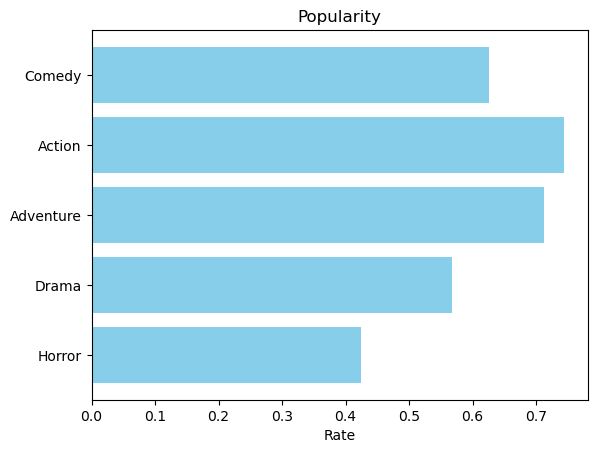

In [99]:
np.random.seed(19680801)
plt.rcdefaults()
fig, ax = plt.subplots()

genres_1 = ( 'Comedy', 'Action', 'Adventure', 'Drama', 'Horror')
y_pos = np.arange(len(genres_1))
Genre_Rate = ( ComedyPop, ActionPop, AdventurePop, DramaPop, HorrorPop)
error = np.random.rand(len(genres_1))

ax.barh(y_pos, Genre_Rate, align='center', color='skyblue')
ax.set_yticks(y_pos)
ax.set_yticklabels(genres_1)
ax.invert_yaxis()
ax.set_xlabel('Rate')
ax.set_title('Popularity')
plt.show()

**I conclude from this chart that the most popular genre is Action.Then, Aventure came second.etc.**

<a id='conclusions'></a>
## Conclusions

### Observation:

>1- I found that highest rating movie is Pink Floyd: Pulse, with 8.7/10 rating.

>2- I found that highest revenue movie is Avatar, with 2781505847 $ revenue.

>3- I noticed that average rating movie is around 6/10, which means their are many movies have low rating and lead to low average rating.

>4- I noticed that average revenue movie by year is 49106971 $. Also, i noticed that is average revenue almost increasing every year.

>5- I Compared between some of the genres selected by me(comedy, action, adventure, drama, horror). in Ratings, Revenues and Popularity. the result:

>5.1-The highest rating genre is drama then comedy.

>5.2-The highest revenue genre is comedy then drama.

>5.3-The most popular genre action then adventure.


### Limitations:

>1- We have used TMBD Movies dataset for our analysis and worked with popularity, revenue and runtime. Our analysis is limited to only the provided dataset. For example, the dataset does not confirm that every release of every director is listed.

>2- There is no normalization or exchange rate or currency conversion is considered during this analysis and our analysis is limited to the numerical values of revenue.

>3- Dropping missing or Null values from variables of our interest might skew our analysis and could show unintentional bias towards the relationship being analyzed. etc.